<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-17 08:35:36--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.9MB/s    in 3.1s    

2025-07-17 08:35:40 (64.9 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 169.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 198.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 118.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 143.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 168.7 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


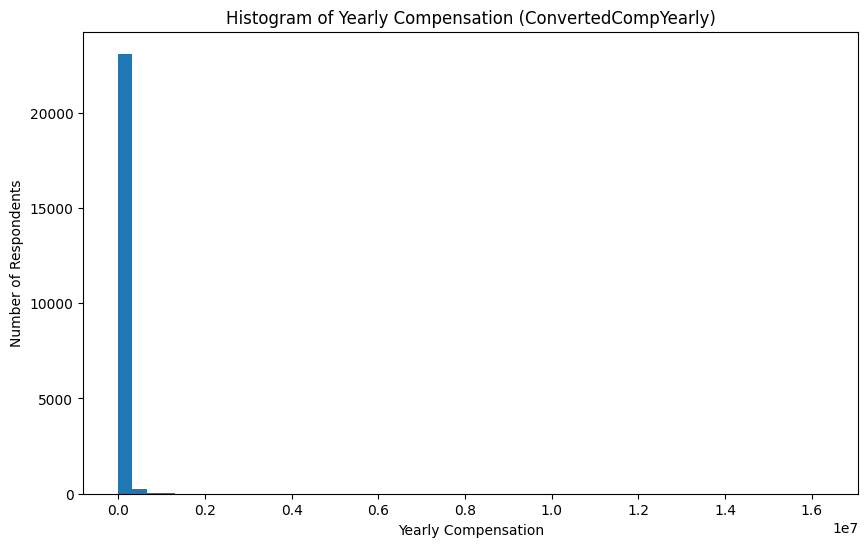

In [14]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['ConvertedCompYearly'].dropna(), bins=50)
plt.title('Histogram of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


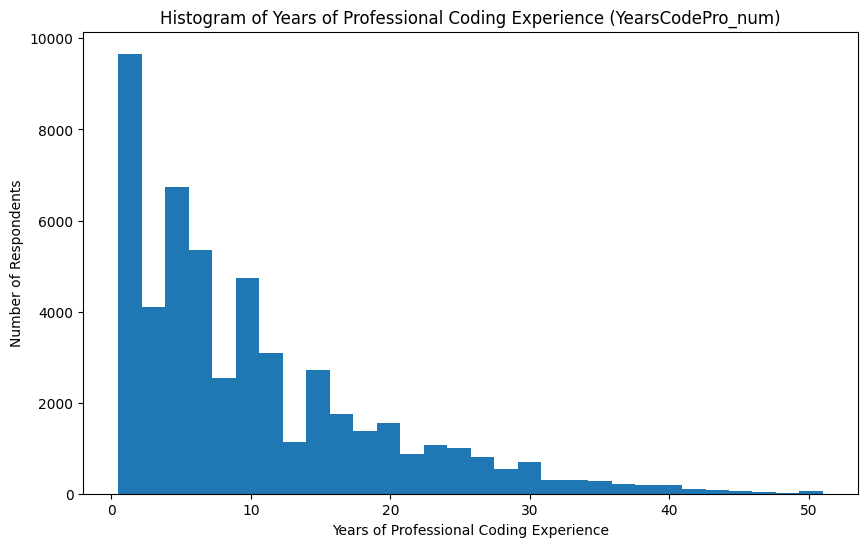

In [15]:
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5  # or 0
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

plt.figure(figsize=(10,6))
plt.hist(df['YearsCodePro_num'].dropna(), bins=30)
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro_num)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.show()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


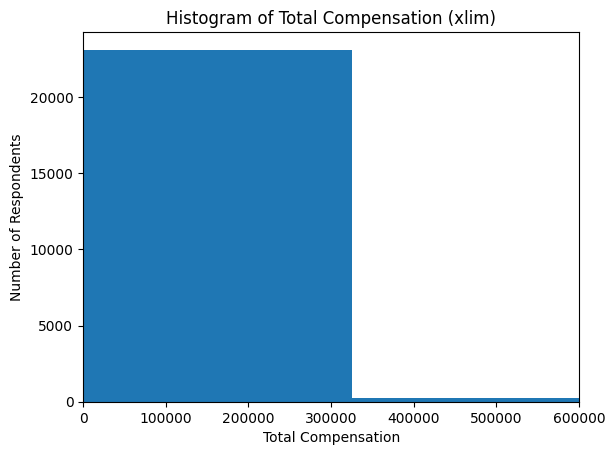

In [22]:
def age_to_num(age_str):
    if pd.isna(age_str):
        return None
    if 'Under' in age_str:
        return 17  # or something less than 18
    if 'Over' in age_str:
        return 65  # or some upper limit
    # For ranges like '25-34 years old'
    try:
        parts = age_str.split('-')
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1].split()[0])) / 2
        else:
            return int(age_str.split()[0])
    except:
        return None

df['Age_num'] = df['Age'].apply(age_to_num)

import matplotlib.pyplot as plt

# Assuming you have a numeric age column called 'Age_num' and numeric compensation 'CompTotal'

# Define age bins and labels
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']

# Create age group column
df['AgeGroup'] = pd.cut(df['Age_num'], bins=bins, labels=labels, right=False)

plt.hist(df['ConvertedCompYearly'].dropna(), bins=50)
plt.xlim(0, 600000)  # Limit x-axis to 300k
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.title('Histogram of Total Compensation (xlim)')
plt.show()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


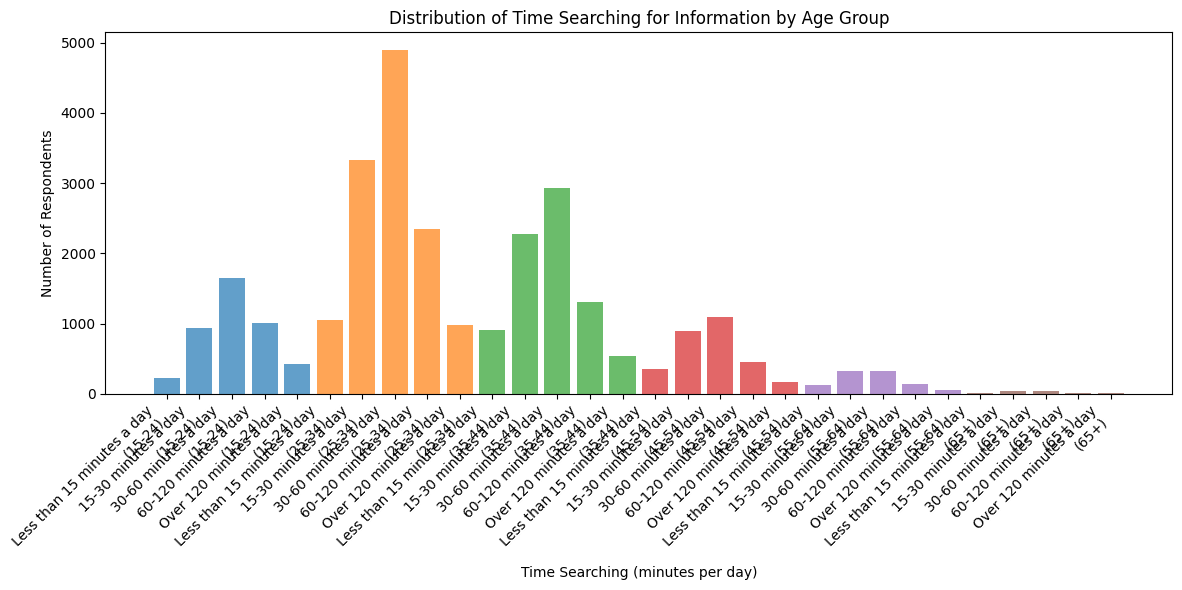

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to convert Age strings to numeric
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Apply conversion
df['Age_numeric'] = df['Age'].apply(convert_age_to_num)

# Create age groups
bins = [15, 25, 35, 45, 55, 65, 75]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['AgeGroup'] = pd.cut(df['Age_numeric'], bins=bins, labels=labels, right=False)

# Filter rows with valid AgeGroup and TimeSearching
df_plot = df.dropna(subset=['AgeGroup', 'TimeSearching'])

# Order categories for plotting
time_order = [
    'Less than 15 minutes a day',
    '15-30 minutes a day',
    '30-60 minutes a day',
    '60-120 minutes a day',
    'Over 120 minutes a day'
]

# Plot histograms (count plot equivalent) of TimeSearching by AgeGroup
plt.figure(figsize=(12, 6))

for age_group in labels:
    subset = df_plot[df_plot['AgeGroup'] == age_group]['TimeSearching']
    counts = subset.value_counts().reindex(time_order).fillna(0)
    plt.bar([f"{t}\n({age_group})" for t in time_order], counts, alpha=0.7)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Time Searching (minutes per day)')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Time Searching for Information by Age Group')
plt.tight_layout()
plt.show()



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


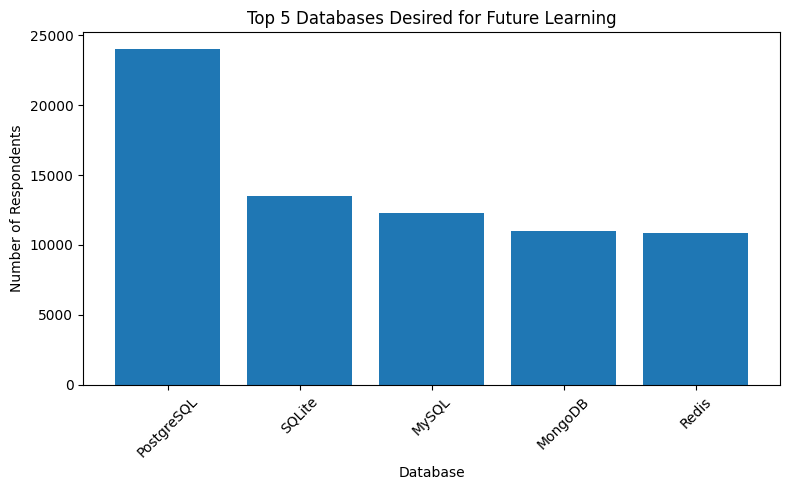

In [33]:
import matplotlib.pyplot as plt

# Drop missing values and split the database names (assuming they are ';' separated)
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')

# Flatten the list of lists into a single list and strip spaces
db_list = [db.strip() for sublist in db_series for db in sublist]

# Count frequency of each database
from collections import Counter
db_counts = Counter(db_list)

# Get top 5 databases
top_5 = db_counts.most_common(5)
databases, counts = zip(*top_5)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(databases, counts)
plt.title('Top 5 Databases Desired for Future Learning')
plt.ylabel('Number of Respondents')
plt.xlabel('Database')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


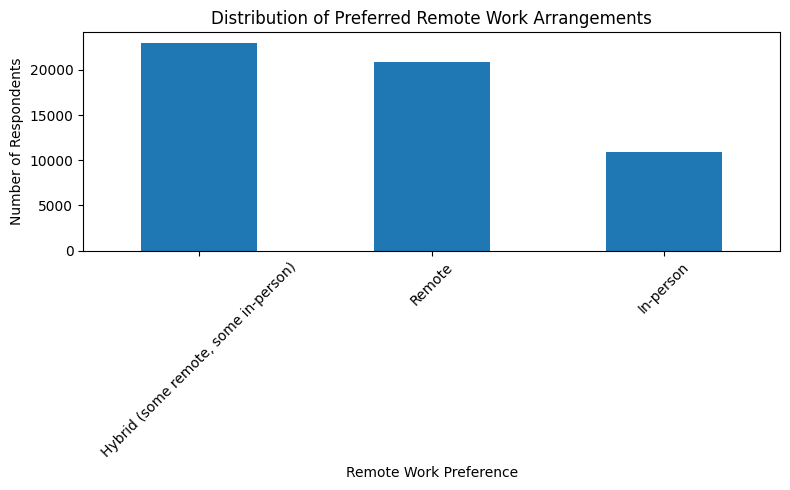

In [34]:
import matplotlib.pyplot as plt

# Drop missing values
remote_data = df['RemoteWork'].dropna()

# Count frequency of each category
remote_counts = remote_data.value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
remote_counts.plot(kind='bar')
plt.title('Distribution of Preferred Remote Work Arrangements')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


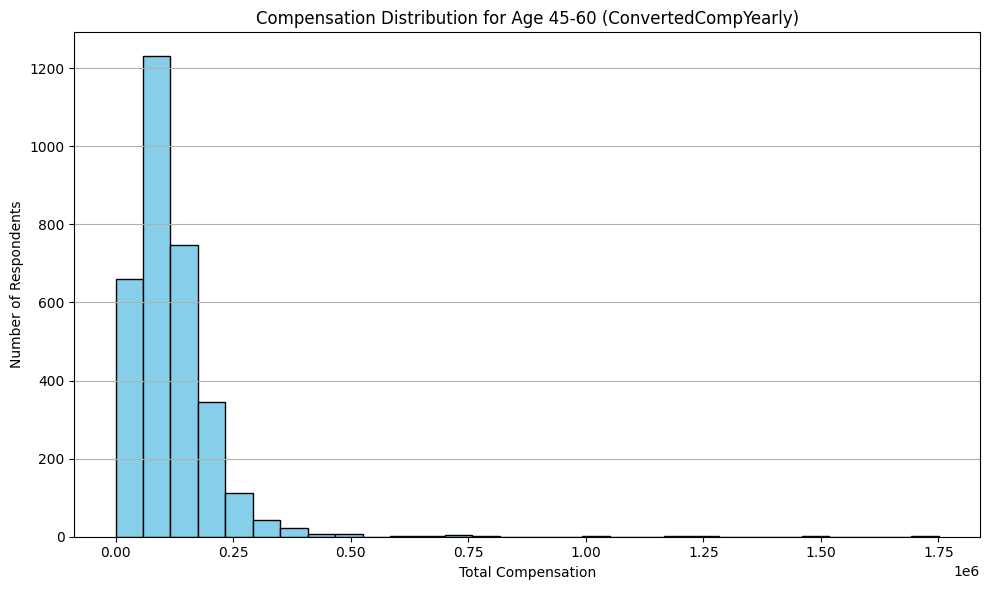

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# First, convert 'Age' to numeric as before (using your conversion function)
def convert_age_to_num(age_str):
    if pd.isna(age_str):
        return None
    age_str = age_str.strip()
    if age_str == 'Under 18 years old':
        return 17
    elif age_str == '18-24 years old':
        return 21
    elif age_str == '25-34 years old':
        return 29.5
    elif age_str == '35-44 years old':
        return 39.5
    elif age_str == '45-54 years old':
        return 49.5
    elif age_str == '55-64 years old':
        return 59.5
    elif age_str == '65 years or older':
        return 65
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age_to_num)

# Filter data for age between 45 and 60
age_filtered = df[(df['Age_numeric'] >= 45) & (df['Age_numeric'] <= 60)]

# Use ConvertedCompYearly if available, else CompTotal
comp_col = 'ConvertedCompYearly' if 'ConvertedCompYearly' in df.columns else 'CompTotal'

# Drop missing compensation data
comp_data = age_filtered[comp_col].dropna()

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(comp_data, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Compensation Distribution for Age 45-60 ({comp_col})')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_300/195921162.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro_num'], bins=bins, labels=labels, right=True)


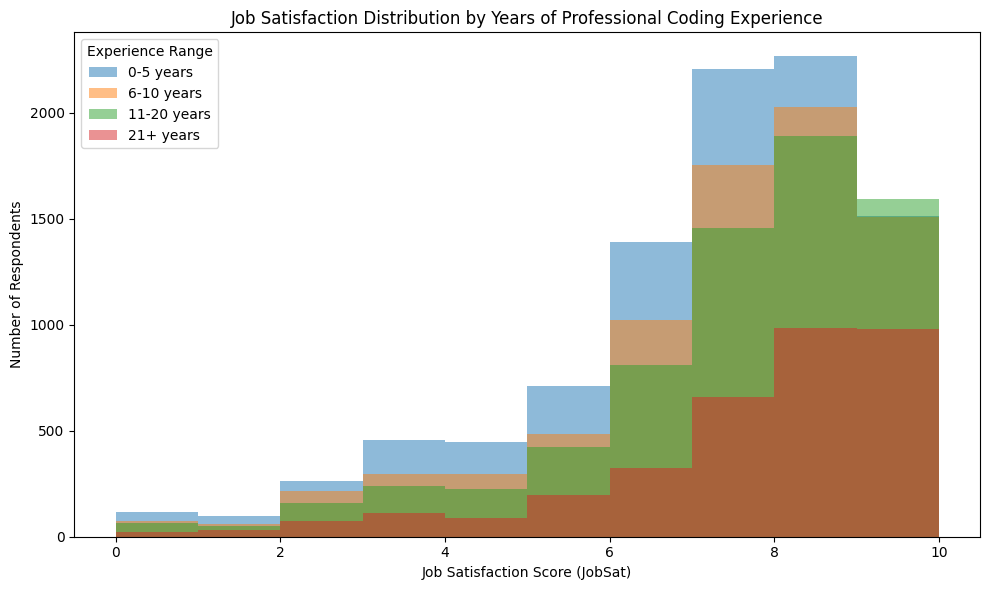

In [36]:
import matplotlib.pyplot as plt

# Function to convert YearsCodePro to numeric
def convert_years(x):
    if pd.isna(x):
        return None
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_years)

# Drop rows with missing JobSat or YearsCodePro_num
df_clean = df.dropna(subset=['JobSat', 'YearsCodePro_num'])

# Create experience bins
bins = [0, 5, 10, 20, 100]
labels = ['0-5 years', '6-10 years', '11-20 years', '21+ years']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro_num'], bins=bins, labels=labels, right=True)

# Plot histogram of JobSat for each experience range
plt.figure(figsize=(10,6))

for label in labels:
    subset = df_clean[df_clean['ExperienceRange'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=label)

plt.xlabel('Job Satisfaction Score (JobSat)')
plt.ylabel('Number of Respondents')
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.legend(title='Experience Range')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [37]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
